In [1]:
# Метод наименьших квадратов

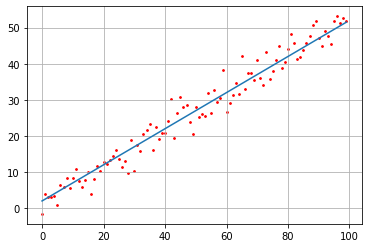

In [95]:
from IPython.display import display, Math, Latex
import time
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 100
sigma = 3
k = 0.5
b = 2

f = np.array([k*z + b for z in range(N)])
y = f + np.random.normal(0, sigma, N)

x = np.array(range(N))

plt.plot(f)
plt.scatter(x, y, s=3, c='red')
plt.grid(True)
plt.show()

In [3]:
# Матричная сумма считается быстрее, чем при помощи цикла for
display(Math(r'a^*_{1,1} = \frac{1}{N}*\sum_{i=1}^{N}x_iy_i'))
display(Math(r'a^*_2 = \frac{1}{N}*\sum_{i=1}^{N}x_i^2'))
display(Math(r'm^*_x = \frac{1}{N}*\sum_{i=1}^{N}x_i'))
display(Math(r'm^*_y = \frac{1}{N}*\sum_{i=1}^{N}y_i'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
display(Math(r'k = \frac{a^*_{1,1} - m^*_xm^*_y}{a^*_2 - (m^*_x)^2}'))
display(Math(r'b = m^*_y - k * m^*_x'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
display(Math(r'a^*_2 = \frac{np.dot(x.T, x)}{N} \rightarrow \vec x^T * \vec x = [0,1,2, ..., N - 1]^T * \begin{vmatrix} 0\\1\\...\\N-1\end{vmatrix} = \sum_{i=0}^{N-1}x_i^2'))

<IPython.core.display.Math object>

In [6]:
mx = x.sum()/N
my = y.sum()/N
a2 = np.dot(x.T, x) / N
a11 = np.dot(x.T, y) / N

In [7]:
kk = (a11 - mx * my) / (a2 - mx**2)
bb = my - kk * mx

In [8]:
ff = np.array([kk * z + bb for z in range(N)])

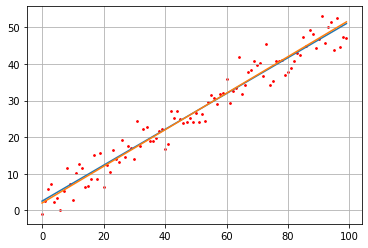

In [9]:
plt.plot(ff)
plt.plot(f)
plt.scatter(x, y, s=3, c='red')
plt.grid(True)
plt.show()

In [10]:
# Метод градиентного спуска

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def f(x):
    return x * x - 5 * x + 5

def df(x):
    return 2 * x - 5

x_plt = np.arange(1, 5, 0.1) # диапазон изменения аргумента (от 0 до 5, с шагом 0.1)
f_plt = [f(x) for x in  x_plt] # для визуализации

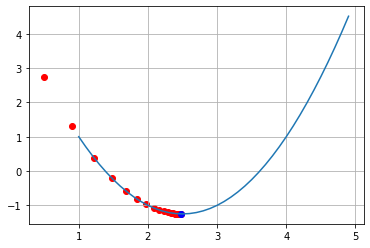

2.471176962384829


In [13]:
lmd = 0.1 # Шаг сходимости
N = 20 # число итераций
xx = 0 # стартовое значение

fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы
    
for i in range(N):
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    point = ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

ax.scatter(xx, f(xx), c='blue')
plt.show()
print(xx)

In [14]:
# Затухающий шаг сходимости

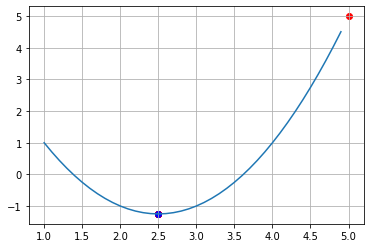

2.5


In [15]:
lmd = 0.3 # Шаг сходимости
N = 20 # число итераций
xx = 0 # стартовое значение

fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы

mn = 100
for i in range(N):
    lmd = 1 / min(i + 1, mn) 
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

ax.scatter(xx, f(xx), c='blue')
plt.show()
print(xx)

In [16]:
def f(x):
    return np.sin(x) + 0.5 * x

def df(x):
    return np.cos(x) + 0.5

In [17]:
x_plt = np.arange(-5, 5, 0.1) # диапазон изменения аргумента (от 0 до 5, с шагом 0.1)
f_plt = [f(x) for x in  x_plt] # для визуализации

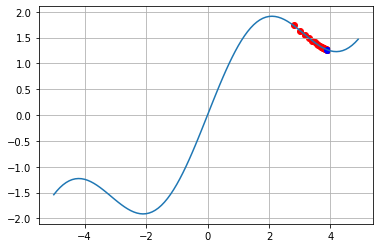

3.884591554825001


In [18]:
lmd = 0.3 # Шаг сходимости
N = 20 # число итераций
xx = 2.5 # стартовое значение

fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы

mn = 100
for i in range(N):
    lmd = 1 / min(i + 1, mn) 
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

ax.scatter(xx, f(xx), c='blue')
plt.show()
print(xx)

In [19]:
# Метод градиентного спуска для поиска двух параметров

In [20]:
display(Math(r'E = \sum_{i=1}^N(y_i - f(x_i))^2 = \sum_{i=1}^N(y_i-ax_i-b)^2'))

<IPython.core.display.Math object>

In [21]:
display(Math(r'\frac{\vartheta E(a,b)}{\vartheta a} = -2 \sum_{i=1}^N (y_i - ax_i -b) * x_i'))
display(Math(r'\frac{\vartheta E(a,b)}{\vartheta b} = -2 \sum_{i=1}^N (y_i - ax_i -b) * 1'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
display(Math(r'a_{n+1} = a_n - \lambda^1_n * \frac{\vartheta E(a,b)}{\vartheta a}'))
display(Math(r'b_{n+1} = b_n - \lambda^2_n * \frac{\vartheta E(a,b)}{\vartheta b}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [75]:
N = 100 # Кол-во экспериментов
Niter = 50 # Кол-во итераций
sigma = 3 # Стандартное отклонение наблюдаемых значений
at = 0.5
bt = 2

def E(y,a,b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y - ff).T, (y - ff))

def dEda(y,a,b):
    ff = np.array([a * z + b for z in range(N)])
    return -2 * np.dot((y - ff).T, range(N))

def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2 * (y - ff).sum()

lmd1 = 0.000001
lmd2 = 0.0005

f = np.array([at * z + bt for z in range(N)]) # теоретическая прямая
y = np.array(f + np.random.normal(0, sigma, N)) # экспериментальные значения Y

a_plt = np.arange(-1, 2, 0.1) 
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

result 0.49941685664852775 1.8833274203561523 689.4284806642484


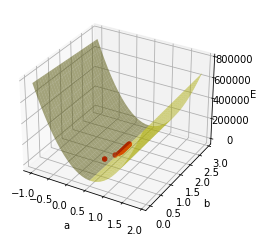

In [94]:
plt.ion()
fig = plt.figure()
ax = plt.axes(projection='3d')

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

# point = ax.scatter(aa, bb, E(y, aa, bb), c='red')

aar = []
bbr = []
aa = 0
bb = 0
for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)
    
    aar.append(aa)
    bbr.append(bb)
    
#     ax.scatter(aa, bb, E(y, aa, bb), c='blue')
#     fig.canvas.draw()
#     fig.canvas.flush_events()
#     time.sleep(0.01)
    
#     print(aa, bb)

yyr = []
for (i, _) in enumerate(aar):
    yyr.append(E(y,aar[i],bbr[i]))
        

ax.scatter(aar, bbr, yyr, c='red')

plt.ioff()
print("result", aa, bb, E(y, aa, bb))

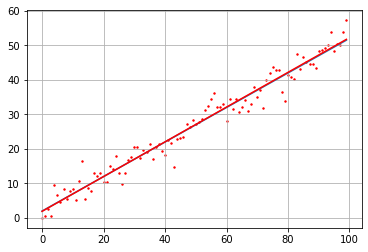

In [27]:
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()

result 0.21234051703900872 1.6141550983124 28501.148467598396


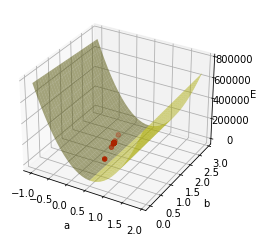

In [88]:
# Инерциальный моменнтный метод

plt.ion()
fig = plt.figure()
ax = plt.axes(projection='3d')

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

# point = ax.scatter(aa, bb, E(y, aa, bb), c='red')

aar = []
bbr = []
aa = 0
bb = 0
gamma = 0.9
for n in range(Niter):
    aa = aa - (lmd1 * dEda(y, aa, bb) + gamma * aa)
    bb = bb - (lmd2 * dEdb(y, aa, bb) + gamma * bb)
    aar.append(aa)
    bbr.append(bb)
#     print(aa, bb)
    
yyr = []
for (i, _) in enumerate(aar):
    yyr.append(E(y,aar[i],bbr[i]))
        

ax.scatter(aar, bbr, yyr, c='red')

print("result", aa, bb, E(y, aa, bb))

In [116]:
from matplotlib import cm

def draw3DG(X, Y, Z, title):
    ''' Нарисовать 3D график и набор точек '''
    fig = plt.figure(figsize=(8, 8), dpi=100)
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 100, cmap=cm.coolwarm)
    
    # ax.view_init(25, -86)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)

def P4Multi(x, y):
    ''' 
        Мультифункция (рис П.3)
        Глобальный экстремум Z = 837,9657 
    '''
    return x * np.sin(4 * np.pi * x) + y * np.sin(4 * np.pi * y)

def P3Schvefel(x, y):
    ''' 
        Синусоидальная функция Швефеля (рис П.3)
        Глобальный экстремум Z = 837,9657 
    '''
    return x * np.sin( np.sqrt(abs(x)) ) + y * np.sin( np.sqrt(abs(y)) )

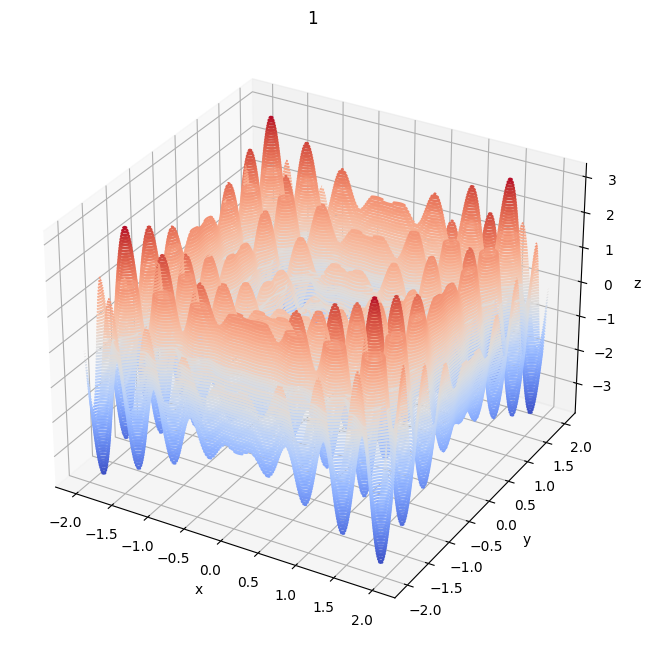

In [115]:
def drawP4Multi():
    p4XRange = np.linspace(-2, 2, 200)
    p4YRange = np.linspace(-2, 2, 200)
    p4X,p4Y = np.meshgrid(p4XRange, p4YRange)

    draw3DG(p4XRange, p4YRange, P4Multi(p4X, p4Y), "1")
    
def drawP3Schvefel():
    p4XRange = np.linspace(-500, 500, 200)
    p4YRange = np.linspace(-500, 500, 200)
    p4X,p4Y = np.meshgrid(p4XRange, p4YRange)

    draw3DG(p4XRange, p4YRange, P3Schvefel(p4X, p4Y), "1")

drawP4Multi() # Мультифункция (рис П.3)

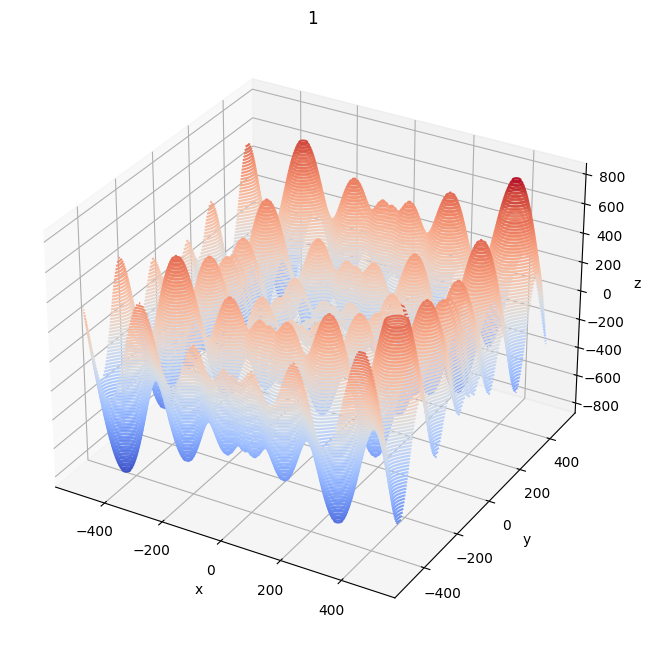

In [117]:
drawP3Schvefel() # Синусоидальная функция Швефеля (рис П.3)